In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
customers = pd.read_csv("./ML_MAIN.csv")

In [3]:
customers.head()


NOME   REGIONE  SUPERFICIE (in KMQ)  ALT MAX (m)  \
0      Pisa   Toscana               185.18           16   
1   Venezia    Veneto               415.90           11   
2   Pescara   Abruzzo                34.36          180   
3  Oristano  Sardegna                84.57          215   
4   Salerno  Campania                59.85          961   

   VOLUMI EROGATI (k-m3)  PERDITE IDRICHE REALI %  \
0                   8121                     39.8   
1                  33875                     28.7   
2                  10710                     49.1   
3                   6888                     49.1   
4                  12492                     56.5   

   KM RETE - DIAMETRO (100 mm)  FUGHE  
0                       240.34     71  
1                       539.77    160  
2                        44.60     13  
3                       109.76     33  
4                        77.68     23

In [4]:
customers.describe()

SUPERFICIE (in KMQ)  ALT MAX (m)  VOLUMI EROGATI (k-m3)  \
count            97.000000    97.000000              97.000000   
mean            184.352062   553.804124           15016.443299   
std             177.467525   526.971134           34828.462578   
min              20.880000    11.000000               3.000000   
25%              65.320000   153.000000            4064.000000   
50%             130.010000   453.000000            7118.000000   
75%             230.660000   787.000000           10710.000000   
max            1287.360000  2285.000000          267640.000000   

       PERDITE IDRICHE REALI %  KM RETE - DIAMETRO (100 mm)       FUGHE  
count                97.000000                    97.000000   97.000000  
mean                 33.397320                   239.260619   70.927835  
std                  16.782087                   230.325678   68.262094  
min                   6.600000                    27.090000    8.000000  
25%                  21.900000                    84.770000   25.000000  
50%                  31.400000                   168.730000   50.000000  
75%                  45.000000                   299.360000   89.000000  
max                 118.740000                  1670.790000  495.000000

In [5]:
import seaborn as sns

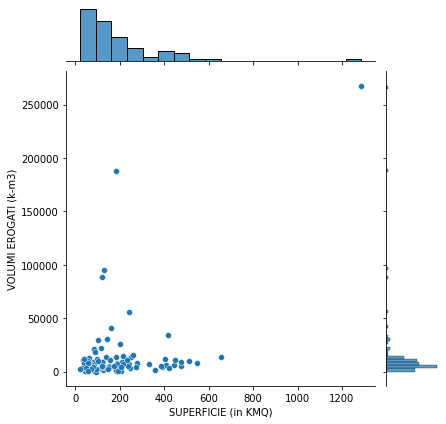

In [6]:
sns.jointplot(data= customers, x = customers['SUPERFICIE (in KMQ)' ],y = customers['VOLUMI EROGATI (k-m3)'])

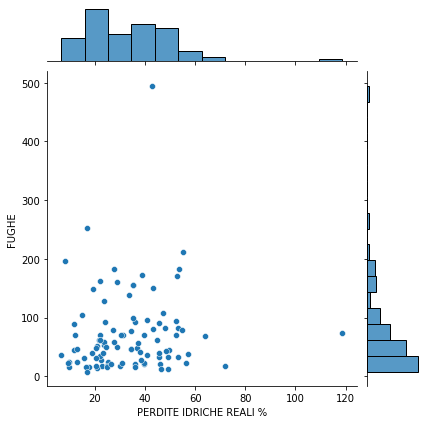

In [7]:
sns.jointplot(data= customers, x = customers['PERDITE IDRICHE REALI %' ],y = customers['FUGHE'])

In [8]:
## Esploriamo le relazioni tra le diverse features

C:\Users\VittorioLorisSimonet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\VittorioLorisSimonet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\VittorioLorisSimonet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\VittorioLorisSimonet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\VittorioLorisSimonet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset ha

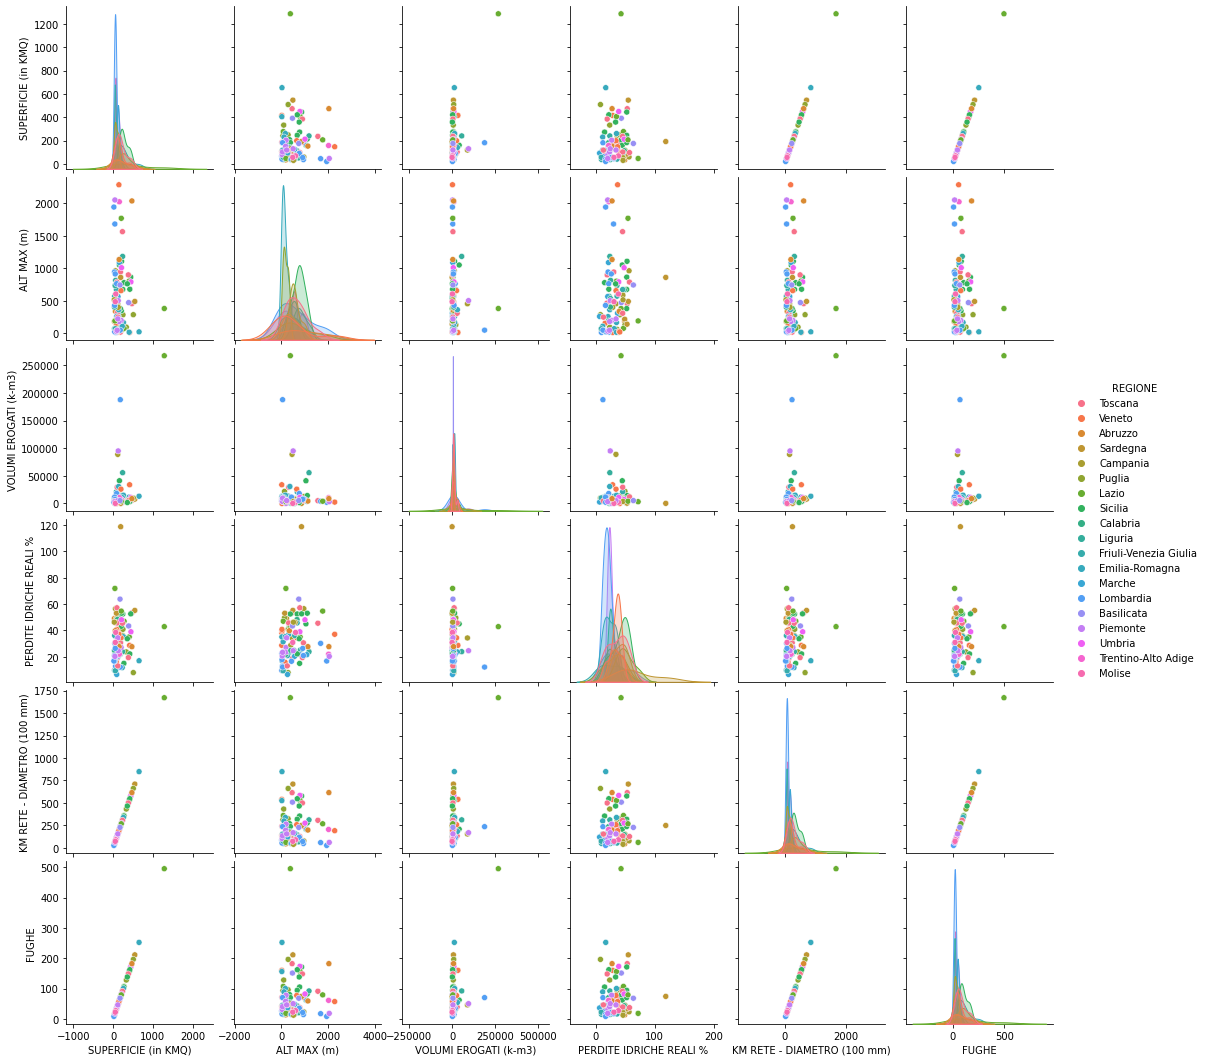

In [9]:
sns.pairplot(customers, hue="REGIONE")

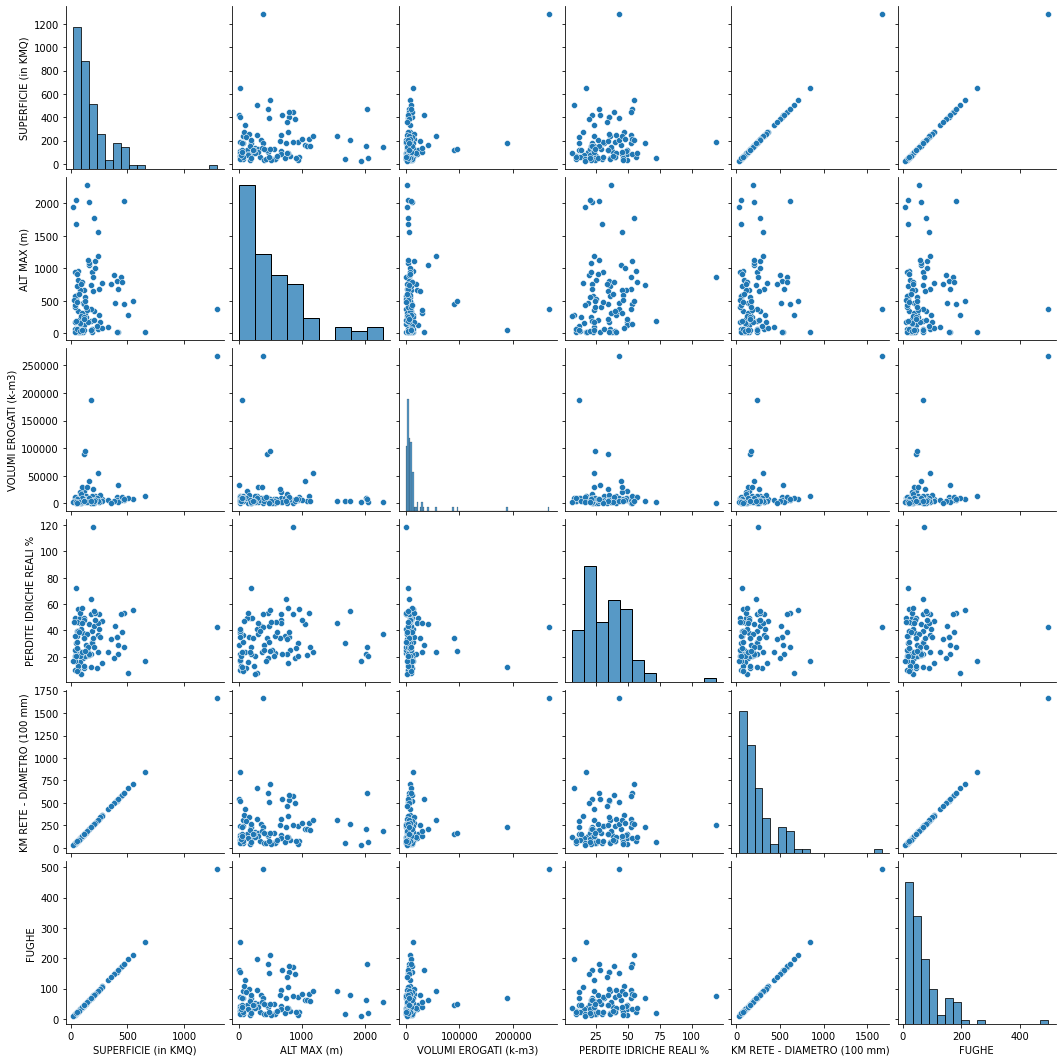

In [10]:
sns.pairplot(customers)

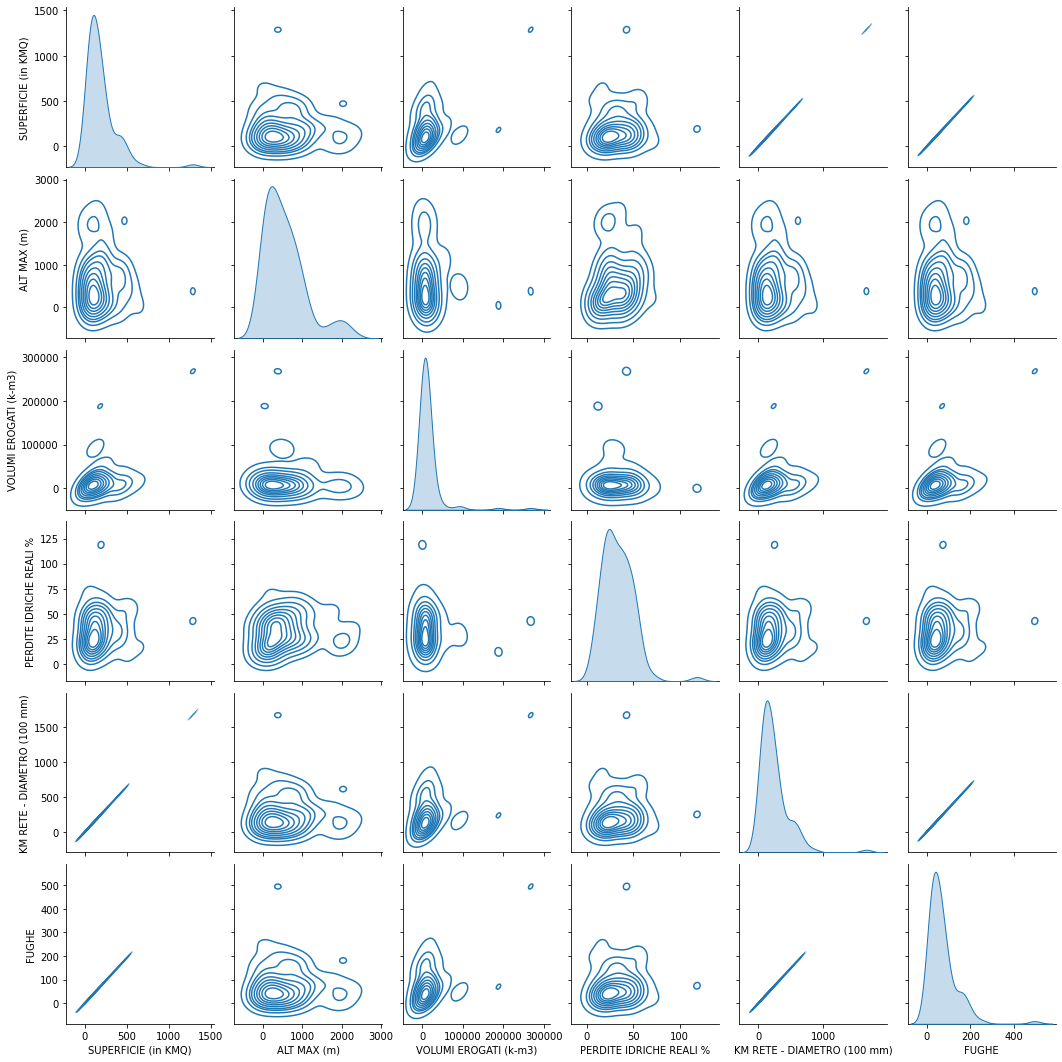

In [11]:
sns.pairplot(customers, kind="kde")

In [12]:
## Ora che ho esplorato il dataset dividiamo in features e target e splittiamo in train_test_split

In [13]:
y = customers['FUGHE']
X = customers[['SUPERFICIE (in KMQ)', 'ALT MAX (m)','VOLUMI EROGATI (k-m3)', 'PERDITE IDRICHE REALI %','KM RETE - DIAMETRO (100 mm)']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
## TRAIN DEL MODELLO

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 4.79987228e-02 -4.19898700e-05 -8.46033907e-07 -7.58620753e-04
  2.59499513e-01]


In [20]:
## PREDICT DEI RISULTATI

In [21]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Valore Predetto')

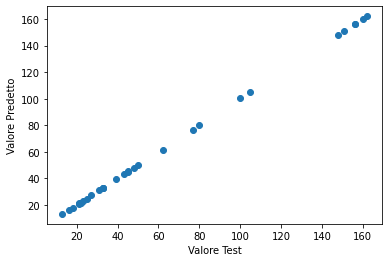

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Valore Test')
plt.ylabel('Valore Predetto')

In [23]:
## VERIFICO LE PERFORMANCE DEL MODELLO CALCOLANDO Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.20252244656660737
MSE: 0.06447313984314093
RMSE: 0.2539156155953015


In [25]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coefficienti']
coeffecients


Coefficienti
SUPERFICIE (in KMQ)          4.799872e-02
ALT MAX (m)                 -4.198987e-05
VOLUMI EROGATI (k-m3)       -8.460339e-07
PERDITE IDRICHE REALI %     -7.586208e-04
KM RETE - DIAMETRO (100 mm)  2.594995e-01

In [26]:
## Valore di R^2 che rappresenta la variazione nei valori di y che può essere giustificata dalla variazione di x; quando è 1 il modello spiega perfettamente i dati.

r2 = lm.score(X, y)
r2

0.9999833723253133

(5.545518710726071, 169.5441070747525, 5.545518710726071, 169.5441070747525)

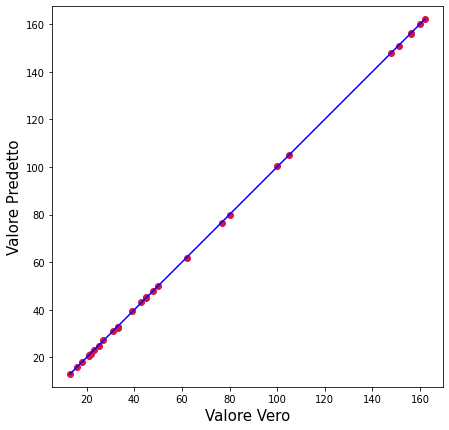

In [27]:
## PLOT Visualizzando valori reali con valori predetti come ulteriore prova di modello con ottima 

# plt.scatter(x_test, y_test, color = "red")
plt.figure(figsize=(7,7))
plt.scatter(y_test, predictions, c='crimson')
p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valore Vero', fontsize=15)
plt.ylabel('Valore Predetto', fontsize=15)
plt.axis('equal')


In [28]:
## Ottengo come interpretazione del risultato che le features indicate hanno una afferenza di predizione elevata in quanto i coefficiendi di correlazione sono molto bassi, pressocchè nell'ordine di 10 a -3 e il valore di r2 coerentemente quasi prossimo a 1.

In [29]:
prova = [[241,59,6681,36.2,312.78]]

In [30]:
risultato = lm.predict(prova)

In [31]:
risultato[0]

92.74312955053556